In [88]:
import numpy
import matplotlib.pyplot as plt
import os
import scipy as sp
import math

SAMPLEFREQ = 44100
FREQUENCIES = numpy.fft.fftfreq(SAMPLEFREQ, d=1/SAMPLEFREQ)

In [89]:
import pyaudio


def aufnahme():
    FORMAT = pyaudio.paInt16
    FRAMESIZE = 1024
    NOFFRAMES = 220
    p = pyaudio.PyAudio()
    print("running")
    stream = p.open(format=FORMAT,channels=1,rate=SAMPLEFREQ,
    input=True,frames_per_buffer=FRAMESIZE)
    data = stream.read(NOFFRAMES*FRAMESIZE)
    decoded = numpy.frombuffer(data,dtype=numpy.int16);
    stream.stop_stream()
    stream.close()
    p.terminate()
    print("done")
    numpy.save("../Versuch4/file",decoded)
    plt.plot(decoded)
    plt.show()
#aufnahme()

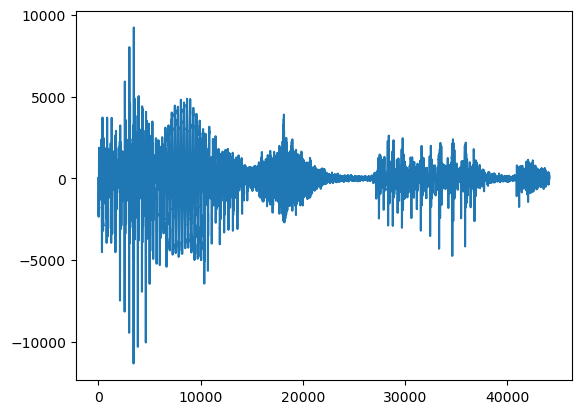

In [90]:

def trigger(path, threshold,skipheader=0):
    sample = numpy.load(path)
    x = []
    for i in range(skipheader,len(sample)):
        if sample[i] >= threshold:
            for j in range(i,len(sample)):
                if(-100<=sample[j]<=100):
                    i=j
                    break
            x = sample[i:]
            break
    return x[0:SAMPLEFREQ]


test = trigger("./file.npy",2500)
plt.plot(test)

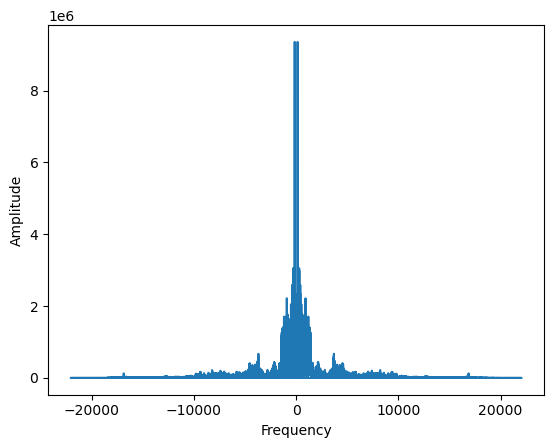

In [91]:

def calculate_amplitude_spectrum(signal):
    n = len(signal)
    spectrum = numpy.fft.fft(signal)
    amplitude_spectrum = numpy.abs(spectrum)
    return amplitude_spectrum

amplitude_spectrum = calculate_amplitude_spectrum(test)
plt.plot(FREQUENCIES, amplitude_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


Aufgabe1 (d) Das mittels Windowing erhaltene Spektrum ist geglättet und hat eine reduzierte Auflösung.

/tmp/ipykernel_589/3590330286.py:2: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_window = numpy.array(sp.signal.gaussian(512, std=4))


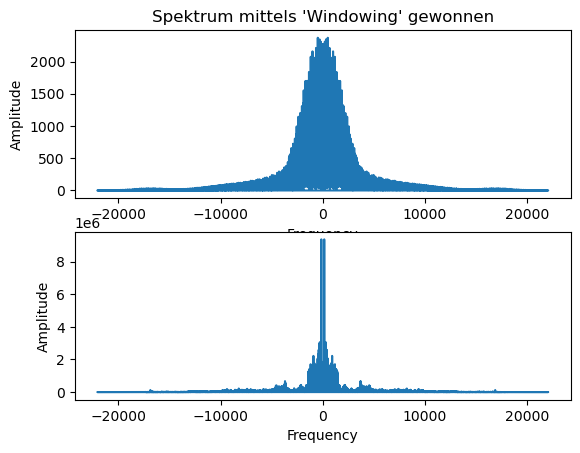

In [93]:
def cutInWindows(signal, window_size=512):
    gauss_window = numpy.array(sp.signal.gaussian(512, std=4))
    retlist = []

    # halbes Überlappen über Schrittweite erledigt
    for i in range(0, len(signal) - window_size + 1, math.floor(window_size / 2)):
        retlist.append(numpy.concatenate( [[0] * i, gauss_window * (signal[i:i + window_size]), [0] * (len(signal) - (i + window_size))] ))
    return retlist

def fft_with_windows(signal):
    n = len(signal)
    tmp = numpy.array(cutInWindows(signal))
    spectrum = numpy.fft.fft(tmp).mean(0)
    amplitude_spectrum = numpy.abs(spectrum)
    return  amplitude_spectrum
    

plt.subplot(2, 1, 1)
a_spec = fft_with_windows(test)
plt.plot(FREQUENCIES, a_spec)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title("Spektrum mittels 'Windowing' gewonnen")

plt.subplot(2, 1, 2)
plt.plot(FREQUENCIES, amplitude_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

Aufgabe 2.1

ValueError: x and y must have same first dimension, but have shapes (44100,) and (1,)

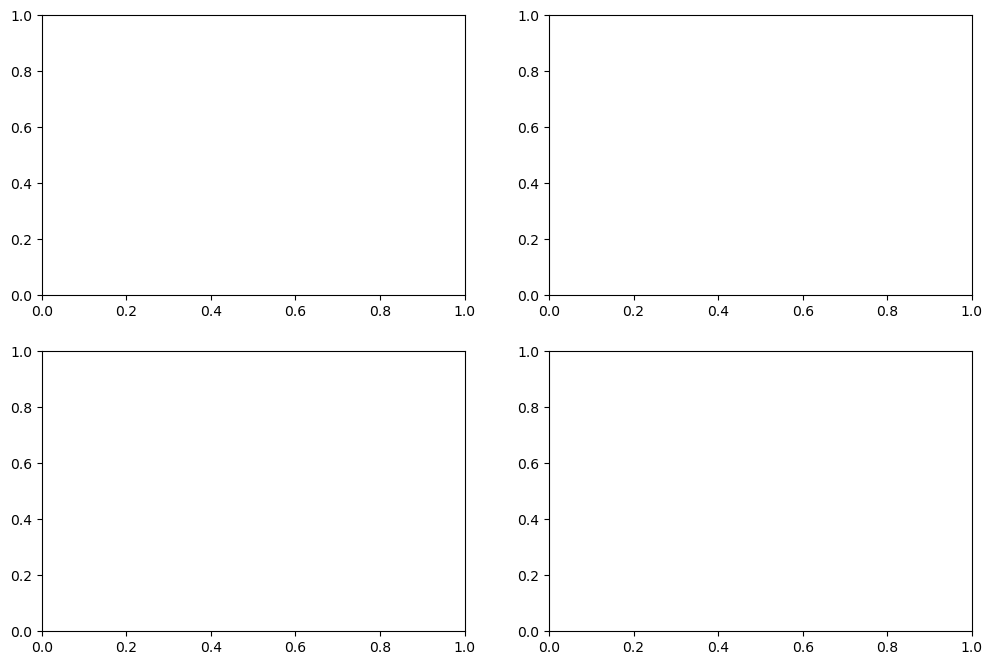

In [104]:
folder_path = "./test/"

rauschen=1200

tief_arrays = {f"tief{i}":trigger(os.path.join(folder_path, f"tief{i}.npy"),rauschen) for i in range(5)}
hoch_arrays = {f"hoch{i}":trigger(os.path.join(folder_path, f"hoch{i}.npy"),rauschen) for i in range(5)}
links_arrays = {f"links{i}":trigger(os.path.join(folder_path, f"links{i}.npy"),rauschen) for i in range(5)}
rechts_arrays = {f"rechts{i}":trigger(os.path.join(folder_path, f"rechts{i}.npy"),rauschen) for i in range(5)}


def plot_average_spectrum(category, arrays, ax=None):
    average_spectrum = numpy.mean([calculate_amplitude_spectrum(arr) for arr in arrays.values()], axis=0)
    ax.plot(FREQUENCIES, average_spectrum, label=category)
    ax.set_title(f'Average Spectrum for {category}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.legend()
    ax.grid(True)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

plot_average_spectrum('Tief', tief_arrays, ax=axes[0, 0])
plot_average_spectrum('Hoch', hoch_arrays, ax=axes[0, 1])
plot_average_spectrum('Links', links_arrays, ax=axes[1, 0])
plot_average_spectrum('Rechts', rechts_arrays, ax=axes[1, 1])

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))

plot_average_spectrum('Tief', tief_arrays, plt.gca())
plot_average_spectrum('Hoch', hoch_arrays, plt.gca())
plot_average_spectrum('Links', links_arrays, plt.gca())
plot_average_spectrum('Rechts', rechts_arrays, plt.gca())

plt.title('Average Spectrum for Different Categories')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
print(str(tief_arrays)+"\n"+str(hoch_arrays))
plt.show()


Just a test

/tmp/ipykernel_589/4201976693.py:2: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_window = numpy.array(sp.signal.gaussian(512, std=4))


KeyboardInterrupt: 

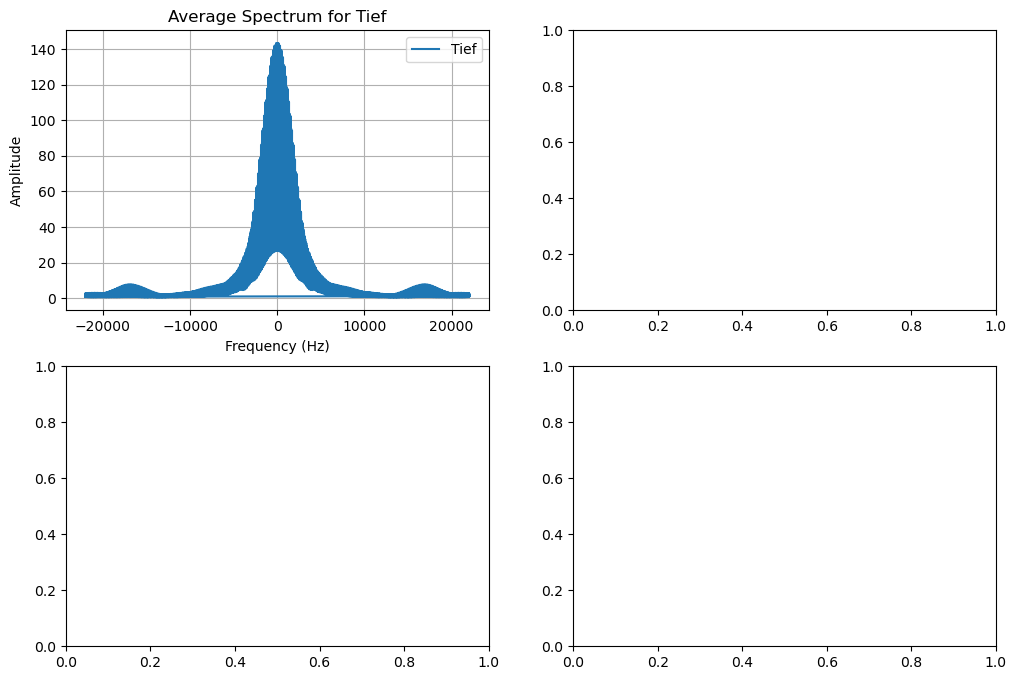

In [ ]:
folder_path = './test/'


tief_arrays = {f'tief{i}': numpy.load(os.path.join(folder_path, f"tief{i}.npy")) for i in range(5)}
hoch_arrays = {f'hoch{i}': numpy.load(os.path.join(folder_path, f"hoch{i}.npy")) for i in range(5)}
links_arrays = {f'links{i}': numpy.load(os.path.join(folder_path, f"links{i}.npy")) for i in range(5)}
rechts_arrays = {f'rechts{i}': numpy.load(os.path.join(folder_path, f"rechts{i}.npy")) for i in range(5)}

def plot_win_average_spectrum(category, arrays, ax=None):
    average_spectrum = numpy.mean([fft_with_windows(arr)[1] for arr in arrays.values()], axis=0)
    ax.plot(fft_with_windows(list(arrays.values())[0])[0], average_spectrum, label=category)
    ax.set_title(f'Average Spectrum for {category}')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.legend()
    ax.grid(True)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

plot_win_average_spectrum('Tief', tief_arrays, ax=axes[0, 0])
plot_win_average_spectrum('Hoch', hoch_arrays, ax=axes[0, 1])
plot_win_average_spectrum('Links', links_arrays, ax=axes[1, 0])
plot_win_average_spectrum('Rechts', rechts_arrays, ax=axes[1, 1])

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))

plot_win_average_spectrum('Tief', tief_arrays, plt.gca())
plot_win_average_spectrum('Hoch', hoch_arrays, plt.gca())
plot_win_average_spectrum('Links', links_arrays, plt.gca())
plot_win_average_spectrum('Rechts', rechts_arrays, plt.gca())

plt.title('Average Spectrum for Different Categories')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
